# Linear REgression

In [3]:
pip install ucimlrepo

Fetch dataset and data frames in X and y

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [6]:
type(X), type(y) #both are dataframes
print(X)
print(y)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  
0               1040.0           676.0   28  
1               1055.0           676.0   28  
2                932.

<Axes: >

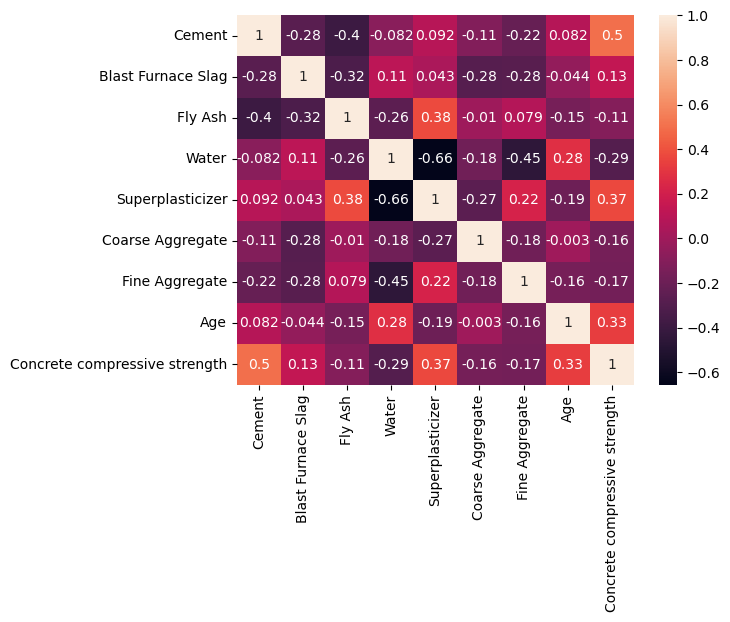

In [7]:
import pandas as pd
import seaborn as sns
entire_data = pd.concat([X,y], axis = 1)
entire_data.corr()
sns.heatmap(entire_data.corr(),annot= True)

In [8]:
concrete_compressive_strength.data

{'ids': None,
 'features':       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
 0      540.0                 0.0      0.0  162.0               2.5   
 1      540.0                 0.0      0.0  162.0               2.5   
 2      332.5               142.5      0.0  228.0               0.0   
 3      332.5               142.5      0.0  228.0               0.0   
 4      198.6               132.4      0.0  192.0               0.0   
 ...      ...                 ...      ...    ...               ...   
 1025   276.4               116.0     90.3  179.6               8.9   
 1026   322.2                 0.0    115.6  196.0              10.4   
 1027   148.5               139.4    108.6  192.7               6.1   
 1028   159.1               186.7      0.0  175.6              11.3   
 1029   260.9               100.5     78.3  200.6               8.6   
 
       Coarse Aggregate  Fine Aggregate  Age  
 0               1040.0           676.0   28  
 1               1055.0   

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(721, 8) (721, 1)
(309, 8) (309, 1)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #instantiating the class LinearRegresion
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_, lr.coef_)

[-35.44918333] [[ 0.12726535  0.11257926  0.09835135 -0.13691381  0.23733402  0.02020436
   0.02616505  0.12251105]]


In [13]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5771752777048791

#### Using mathematics

In [15]:
import numpy as np

In [16]:
x = np.array([2,5,7,8,9,10,23,45])
y = np.array([13,15,20,34,36,56,66,78])

In [17]:
n = len(x)

In [18]:
b1 = ((sum(x) * sum(y))/n - sum(x * y)) / ((sum(x) ** 2) / n - sum(x**2)) #b1 (slope) Least Square Method

In [19]:
b1

1.5031881454872025

In [20]:
bo = (y.sum() - b1*(x.sum())) / n # y-intercept bo
bo

19.269061517736866

In [21]:
lr.fit(x.reshape(-1, 1),y)
lr.intercept_, lr.coef_

(19.26906151773686, array([1.50318815]))

In [22]:
x.shape

(8,)

In [4]:
x.reshape(-1,8)

NameError: name 'x' is not defined

### boston dataset

In [25]:
df = pd.read_csv("datasets/boston.csv")


- crim	-- per capita crime rate by town
- zn	-- proportion of residential land zoned for lots over 25,000 sq.ft
- indus	-- proportion of non-retail business acres per town
- chas	-- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- nox	-- nitric oxides concentration (parts per 10 million)
- rm	-- average number of rooms per dwelling
- age	-- proportion of owner-occupied units built prior to 1940
- dis	-- weighted distances to five Boston employment centres
- rad	-- index of accessibility to radial highways
- tax	-- full-value property-tax rate per USD 10,000
- ptratio-- 	pupil-teacher ratio by town
- - b	
 where 
 is the proportion of blacks by town
- lstat-- 	percentage of lower status of the population
- medv	-- median value of owner-occupied homes in USD 1000's
The corrected data set has the following additional columns:

cmedv	corrected median value of owner-occupied homes in USD 1000's
town	name of town
tract	census tract
lon	longitude of census tract
lat	latitude of census tract

In [27]:
df
#medv is y i.e the response variable
#others are x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [28]:
df["black"].nsmallest(10)

450     0.32
423     2.52
410     2.60
457     3.50
424     3.65
454     6.68
425     7.68
437     9.32
456    10.48
418    16.45
Name: black, dtype: float64

In [29]:
df.iloc[418].T

crim        73.5341
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6790
rm           5.9570
age        100.0000
dis          1.8026
rad         24.0000
tax        666.0000
ptratio     20.2000
black       16.4500
lstat       20.6200
medv         8.8000
Name: 418, dtype: float64

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [31]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
y = df['medv']
X = df.drop('medv', axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

In [36]:
r2_score(y_test, y_pred)

0.7133431144123461

- correlation between %lower status and median value

In [38]:
df['lstat'].corr(df['medv'])

-0.7376627261740151

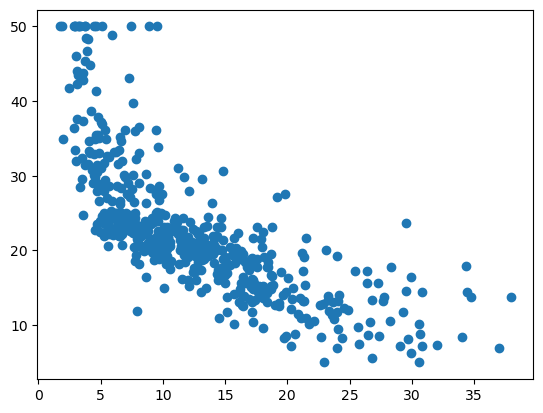

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df['lstat'], df['medv'])

In [40]:
(df['lstat']**2).corr(df['medv'])

-0.6221787647682886

In [41]:
X= df[['lstat']]
y=df['medv']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)

In [43]:
lr.fit(X_train, y_train)
y_pred =(lr.predict(X_test))
r2_score(y_test, y_pred)

0.5279301917445974

### polynomial features
- class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
- - include_biasbool, default=True
If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).
- interaction_onlybool, default=False
If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:

included: x[0], x[1], x[0] * x[1], etc.

excluded: x[0] ** 2, x[0] ** 2 * x[1],

- - here fit function compute number of output features
  - **transform** transforms data to polynomial features etc.


In [45]:
pol = PolynomialFeatures(degree = 2, include_bias = False).set_output(transform = 'pandas') 

.set_output(transform = 'pandas') 
- to get in different format than the numoy array 

In [47]:
X_pol_trn = pol.fit_transform(X_train)
X_pol_tst = pol.transform(X_test)
lr.fit(X_pol_trn, y_train)
y_pred  = lr.predict(X_pol_tst)
r2_score(y_test, y_pred)

0.6431149312301052

- Taking columns: rad & lstat

In [49]:
X = df[['lstat', 'rad']]
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [50]:
X_pol_trn = pol.fit_transform(X_train)
X_pol_tst = pol.transform(X_test)
lr.fit(X_pol_trn, y_train)
y_pred = lr.predict(X_pol_tst)
r2_score(y_test, y_pred)

0.6218318317134488

In [51]:
X_pol_trn.columns

Index(['lstat', 'rad', 'lstat^2', 'lstat rad', 'rad^2'], dtype='object')

- for all the columns

In [53]:
y= df['medv']
X=df.drop('medv', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)

In [54]:
pol = PolynomialFeatures(degree = 1, include_bias = False).set_output(transform = 'pandas') 
X_pol_trn = pol.fit_transform(X_train)
X_pol_tst = pol.transform(X_test)
lr.fit(X_pol_trn, y_train)
y_pred = lr.predict(X_pol_tst)
r2_score(y_test, y_pred)

0.7133431144123464

In [55]:
poly = PolynomialFeatures(degree =3, include_bias= False).set_output(transform= 'pandas')
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn,y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test, y_pred)

-8442.445261153322

### Using Pipelines
- class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)
- steps - 
list of tuples
List of (name of step, estimator) tuples that are to be chained in sequential order. To be compatible with the scikit-learn API, all steps must define fit. All non-last steps must also define transform.


In [57]:
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=3,include_bias=False).set_output(transform= 'pandas')
lr= LinearRegression()
pipe = Pipeline([ ('POLY', poly),('LR',lr)])


In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('POLY', PolynomialFeatures(degree=3, include_bias=False)),
                ('LR', LinearRegression())])

#### Housing Dataset

In [60]:
housing = pd.read_csv('Datasets/Housing.csv')
housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [61]:
X = housing[['driveway']]
y = housing['price']

*.get_dummies()* from Pandas
- is one of the method by which we can do onehot encoding
-  -drop_first = True):- what drop first will do is drop the first collumn as our function will generate two columns for no one and for yes 2nd so they are same on fundamental level so 

In [63]:
dum_X = pd.get_dummies(X)
dum_X.drop("driveway_yes", axis = 1, inplace = True)
# print(dum_X.value_counts())
lr=LinearRegression()
lr.fit(dum_X,y)
lr.intercept_, lr.coef_

(71333.89552238806, array([-22778.11630161]))

In [64]:
dum_X

,driveway_no
0,False
1,False
2,False
3,False
4,False
...,...
541,False
542,False
543,False
544,False


### OneHotEncoder

- class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')

--------------------------------------------------------------------------------------------

- handle_unknown{‘error’, ‘ignore’, ‘infrequent_if_exist’, ‘warn’}, default=’error’ 

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False).set_output(transform = 'pandas')

In [68]:
dum_x = ohe.fit_transform(X)

In [69]:
lr.fit(dum_x, y)
lr.intercept_, lr.coef_

(48555.77922077922, array([22778.11630161]))

- two columns driveway

get dummies doesnot touch teh numeric columns that is it does onehotencoding of only object type variables

In [72]:
X = housing[['driveway', 'airco', 'bedrooms']]
pd.get_dummies(X)

,bedrooms,driveway_no,driveway_yes,airco_no,airco_yes
0,3,False,True,True,False
1,2,False,True,True,False
2,3,False,True,True,False
3,3,False,True,True,False
4,2,False,True,True,False
...,...,...,...,...,...
541,3,False,True,False,True
542,3,False,True,False,True
543,3,False,True,False,True
544,3,False,True,False,True


In [73]:
dum_x = ohe.fit_transform(X)
lr.fit(dum_x, y)
lr.intercept_, lr.coef_

(28694.190816010676,
 array([20111.61836798, 20938.60621995,  2650.68368749, 17104.40890437,
        26983.73597376, 36097.25629722, 19644.19081601]))

In [74]:
dum_x

,driveway_yes,airco_yes,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
541,1.0,1.0,0.0,1.0,0.0,0.0,0.0
542,1.0,1.0,0.0,1.0,0.0,0.0,0.0
543,1.0,1.0,0.0,1.0,0.0,0.0,0.0
544,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### column transformers

-----------------------------------
 - make_column_transformer(('passthrough', num_cols), (ohe, str_cols))
 - - i.e dont do anything on num_cl and do ohe on str_col

In [76]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [77]:
str_col = housing.columns[housing.dtypes == object]
num_col = housing.columns[housing.dtypes != object]

In [78]:
ct = make_column_transformer(('passthrough', num_col), (ohe, str_col), verbose_feature_names_out = False).set_output(transform = 'pandas')
df1 = ct.fit_transform(housing)

In [79]:
y = df1['price']
X = df1.drop('price', axis =1 )

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.6246856191453717

In [81]:
poly = PolynomialFeatures(degree=2,include_bias=False).set_output(transform= 'pandas')
pipe = Pipeline([ ('POLY', poly),('LR',lr)])

In [82]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.5558314095911471

#### using make_column_selector we will not need to make columns manually we can do this directly by just using **make_coumn_selector**

In [84]:
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude=object)), (ohe, make_column_selector(dtype_include = object)), verbose_feature_names_out = False).set_output(transform = 'pandas')
df1 = ct.fit_transform(housing)

## Scaling

In [86]:
import numpy as np

In [87]:
a=np.array([90,34,89,23,50,120,67])
b=np.array([1,3,4,2,5,2,3])

In [88]:
ma, mb = a.mean(), b.mean()

In [89]:
sa, sb = a.std(), b.std()

In [90]:
scl_a = (a-ma)/sa
scl_b = (b-mb)/sb
print(scl_a)
print(scl_b)

[ 0.70257514 -1.05162521  0.67125013 -1.39620027 -0.55042511  1.64232532
 -0.0179    ]
[-1.49120227  0.11470787  0.91766294 -0.6882472   1.720618   -0.6882472
  0.11470787]


In [91]:
(ma,sa), (scl_a.mean(), scl_a.std())

((67.57142857142857, 31.923377653630677), (7.335402126987641e-17, 1.0))

In [92]:
(mb,sb), (scl_b.mean(), scl_b.std())

((2.857142857142857, 1.2453996981544782), (-8.921435019309294e-17, 1.0))

In [93]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [94]:
scl_std= StandardScaler()
df= pd.DataFrame({'a':a, 'b':b})
#.fit() calculate the mean and std deviation of all the elements of the dataframe
#.transform() scales it
scl_std.fit_transform(df) 

array([[ 0.70257514, -1.49120227],
       [-1.05162521,  0.11470787],
       [ 0.67125013,  0.91766294],
       [-1.39620027, -0.6882472 ],
       [-0.55042511,  1.720618  ],
       [ 1.64232532, -0.6882472 ],
       [-0.0179    ,  0.11470787]])

In [95]:
print(scl_std.mean_)
print(ma,mb)

[67.57142857  2.85714286]
67.57142857142857 2.857142857142857


### MinMax Scaling
- x = MinMaxScaler()

In [97]:
a,b

(array([ 90,  34,  89,  23,  50, 120,  67]), array([1, 3, 4, 2, 5, 2, 3]))

In [98]:
mn_a, mn_b, mx_a, mx_b = a.min(), b.min(), a.max(), b.max()

In [99]:
print(mn_a, mn_b, mx_a, mx_b)

23 1 120 5


In [100]:
scl_a = (a- mn_a) / (mx_a-mn_a)
scl_a

array([0.69072165, 0.11340206, 0.68041237, 0.        , 0.27835052,
       1.        , 0.45360825])

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scl = MinMaxScaler()
scl.fit_transform(df)

array([[0.69072165, 0.        ],
       [0.11340206, 0.5       ],
       [0.68041237, 0.75      ],
       [0.        , 0.25      ],
       [0.27835052, 1.        ],
       [1.        , 0.25      ],
       [0.45360825, 0.5       ]])

### doing again

In [103]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [104]:
concrete_compressive_strenght = fetch_ucirepo(id = 165)

In [105]:
X = concrete_compressive_strenght.data.features
y = concrete_compressive_strenght.data.targets

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)

In [107]:
poly = PolynomialFeatures(degree=3,include_bias=False)
lr= LinearRegression()
scl = StandardScaler()
pipe = Pipeline([("SCL", scl), ('POLY', poly), ('LR',lr)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('SCL', StandardScaler()),
                ('POLY', PolynomialFeatures(degree=3, include_bias=False)),
                ('LR', LinearRegression())])

In [108]:
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.862281871260191

- using minmaxscaler

In [110]:
poly = PolynomialFeatures(degree=3,include_bias=False)
lr= LinearRegression()
scl = MinMaxScaler()
pipe = Pipeline([("SCL", scl), ('POLY', poly), ('LR',lr)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('SCL', MinMaxScaler()),
                ('POLY', PolynomialFeatures(degree=3, include_bias=False)),
                ('LR', LinearRegression())])

In [111]:
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8622818712601948

# Regularized regression

## Ridge Regression

In [114]:
from sklearn.linear_model import Ridge

In [115]:
X = concrete_compressive_strenght.data.features
y = concrete_compressive_strenght.data.targets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)

In [116]:
lr = LinearRegression()
ridge = Ridge()

In [117]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5771752777048791

In [118]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test, y_pred)

0.7807023265195984

In [119]:
poly = PolynomialFeatures(degree = 3, include_bias = False).set_output(transform= 'pandas')
lr= LinearRegression()
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
ridge.fit(X_poly_trn, y_train)
y_pred = ridge.predict(X_poly_tst)
r2_score(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.96075e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.8695065063191985

In [120]:
df_coef = pd.DataFrame({'col_names' : list(X_poly_trn.columns), 'coef':list(ridge.coef_[0])})

In [121]:
df_coef.shape

(164, 2)

In [122]:
df_coef[df_coef['coef'] > 0.0001].head()

,col_names,coef
1,Blast Furnace Slag,0.636144
5,Coarse Aggregate,2.612272
6,Fine Aggregate,0.909094
7,Age,0.123618
8,Cement^2,0.010445


- Considering different values of alpha

In [124]:
ridge = Ridge(alpha = 0)

In [125]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2_score(y_test, y_pred)

0.5771752777048793

- hyperparameter tuning

In [127]:
alphas = [0.01, 0.1, 0.2, 0.6, 1, 1.5, 2, 4, 10]
scores = []
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
np.argmax(scores)


0

In [128]:
i_max = np.argmax(scores)
print("Best alpha: ", alphas[i_max])
print('Best score: ', scores[i_max])

Best alpha:  0.01
Best score:  0.5771752740273375


In [129]:
# np.arange(0.01,30,0.5)
alphas=list(np.linspace(0.0001, 10, 20))
print('alphas: ', alphas)
score =[]
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit (X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
np.argmax(scores)
i_max = np.argmax(scores)

print("\n\nBest alpha: ", alphas[i_max])
print('Best score: ', scores[i_max])

alphas:  [0.0001, 0.5264105263157894, 1.052721052631579, 1.5790315789473683, 2.105342105263158, 2.6316526315789477, 3.157963157894737, 3.684273684210526, 4.210584210526315, 4.736894736842105, 5.263205263157895, 5.7895157894736835, 6.315826315789473, 6.842136842105263, 7.368447368421052, 7.894757894736841, 8.421068421052631, 8.94737894736842, 9.47368947368421, 10.0]


Best alpha:  4.736894736842105
Best score:  0.5771752776681036


## Lasso Regression

In [131]:
from sklearn.linear_model import Lasso

In [132]:
lasso = Lasso()

In [133]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)

0.576333587787164

In [134]:
# np.arange(0.01,30,0.5)
alphas=list(np.linspace(0.0001, 10, 20))
print('alphas: ', alphas)
score =[]
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit (X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
np.argmax(scores)
i_max = np.argmax(scores)

print("\n\nBest alpha: ", alphas[i_max])
print('Best score: ', scores[i_max])

alphas:  [0.0001, 0.5264105263157894, 1.052721052631579, 1.5790315789473683, 2.105342105263158, 2.6316526315789477, 3.157963157894737, 3.684273684210526, 4.210584210526315, 4.736894736842105, 5.263205263157895, 5.7895157894736835, 6.315826315789473, 6.842136842105263, 7.368447368421052, 7.894757894736841, 8.421068421052631, 8.94737894736842, 9.47368947368421, 10.0]


Best alpha:  4.736894736842105
Best score:  0.5771752776681036


## Elasticnet Regression

In [136]:
from sklearn.linear_model import ElasticNet

In [137]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
r2_score(y_test, y_pred)

0.5766806310401154

In [138]:
alphas = np.linspace(0.0001, 10, 20)
r = np.linspace(0.0001, 1, 10)


In [139]:
scores = []
for a in alphas:
    for i in r:
        elastic = ElasticNet(alpha = a, l1_ratio = i)
        elastic.fit(X_train, y_train)
        y_pred = elastic.predict(X_test)
        scores.append([a, i, r2_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns = ['alpha', 'l1_ratio', 'score'])
df_scores.sort_values('score', ascending = False).head()

,alpha,l1_ratio,score
0,0.0001,0.0001,0.577175
1,0.0001,0.1112,0.577175
2,0.0001,0.2223,0.577175
3,0.0001,0.3334,0.577175
4,0.0001,0.4445,0.577175


In [140]:
housing = pd.read_csv("Datasets/housing.csv")

In [141]:
y = housing.price
X = housing.drop( "price", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = .3)
ohe = OneHotEncoder(drop = 'first', sparse_output = False).set_output(transform = 'pandas')

In [142]:
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ohe, make_column_selector(dtype_include = object)), verbose_feature_names_out = False).set_output(transform = 'pandas') 
pipe = Pipeline([('CT', ct), ('ELASTIC', elastic)])

In [143]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA846541A0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA84656660>)],
                                   verbose_feature_names_out=False)),
                ('ELASTIC', ElasticNet(alpha=10.0, l1_ratio=1.0))])

In [144]:
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.6245798937139021

In [145]:
scores = []
for a in alphas:
    for i in r:
        elastic = ElasticNet(alpha = a, l1_ratio = i)
        pipe = Pipeline([('CT', ct), ('ELASTIC', elastic)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        scores.append([a, i, r2_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns = ['alpha', 'l1_ratio', 'score'])
df_scores.sort_values('score', ascending = False).head()

,alpha,l1_ratio,score
9,0.000100,1.0000,0.624686
8,0.000100,0.8889,0.624684
7,0.000100,0.7778,0.624682
19,0.526411,1.0000,0.624680
6,0.000100,0.6667,0.624680


#### Building best model on best score

In [147]:
elastic = ElasticNet(alpha = df_scores.iloc[0,0], l1_ratio = df_scores.iloc[0,1])
pipe = Pipeline([('CT', ct), ('ELASTIC', elastic)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA846541A0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA84656660>)],
                                   verbose_feature_names_out=False)),
                ('ELASTIC', ElasticNet(alpha=0.0001, l1_ratio=0.0001))])

# miscellaneous topics

### dealing with missing data
- sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
- -----------------------------------------------------------
`.fit()` calculates the mean/median according to the strategy. `transform()` does the replacing of the missing values with the mean/median.

In [150]:
from sklearn.impute import SimpleImputer
import pandas as pd
chem = pd.read_csv("Datasets/ChemicalProcess.csv")

In [151]:
chem.isnull().sum().sum()

106

In [152]:
#Constant Strategy
imp_const = SimpleImputer(strategy = 'constant', fill_value = 0.5).set_output(transform = 'pandas')
chem_const = imp_const.fit_transform(chem) 
chem_const.isnull().sum().sum()

0

In [153]:
#Mean Strategy
imp_mean = SimpleImputer(strategy = 'mean').set_output(transform = 'pandas')
chem_mean = imp_mean.fit_transform(chem) 
chem_mean.isnull().sum().sum()

0

In [154]:
#Median Strategy
imp_median = SimpleImputer(strategy = 'median').set_output(transform = 'pandas')
chem_median = imp_median.fit_transform(chem) 
chem_median.isnull().sum().sum()

0

In [155]:
imp_median.statistics_

array([ 3.9970e+01,  6.3050e+00,  5.5090e+01,  6.7220e+01,  1.2100e+01,
        1.8490e+01,  4.8460e+01,  1.0000e+02,  1.7510e+01,  1.2835e+01,
        2.7100e+00,  1.4608e+02,  2.0120e+01,  1.1400e+01,  2.1000e+01,
        1.5400e+00,  9.3400e+02,  9.9920e+02,  2.0680e+02,  1.7700e+02,
        1.7800e+02,  4.5730e+01,  9.1000e+00,  9.4000e+00,  0.0000e+00,
        3.4600e+01,  4.8560e+03,  6.0315e+03,  4.5880e+03,  3.4400e+01,
        4.8350e+03,  6.0220e+03,  4.5820e+03, -3.0000e-01,  5.0000e+00,
        3.0000e+00,  8.0000e+00,  4.8550e+03,  6.0470e+03,  4.5870e+03,
        1.0400e+01,  1.9900e+01,  9.1000e+00,  7.0800e+01,  1.5800e+02,
        6.4000e+01,  2.5000e+00,  4.9500e+02,  2.0000e-02,  1.0000e+00,
        3.0000e+00,  7.2000e+00,  0.0000e+00,  0.0000e+00,  1.1600e+01,
        8.0000e-01,  1.9000e+00,  2.2000e+00])

In [156]:
chem.shape

(176, 58)

In [157]:
(imp_median.statistics_).shape

(58,)

In [158]:
X = chem.drop('Yield',axis=1)
y = chem['Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3)

In [159]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

66
40


##### mean stratergy
- `.fit()` or `fit_transform()` should be applied only on train set. `.transform()` should be applied on test
- As we to carry forward the charactersitcs from train dataset to test dataset to prevent "Data Leakage Problem" (in which statistics are again calculated on test dataset)

In [161]:
imp_mean = SimpleImputer(strategy='mean').set_output(transform='pandas')
imp_mean.fit(X_train)
X_imp_trn = imp_mean.transform(X_train)
X_imp_tst = imp_mean.transform(X_test)
print(X_imp_trn.isnull().sum().sum())
print(X_imp_tst.isnull().sum().sum())


0
0


In [162]:
X_imp_trn = imp_mean.fit_transform(X_train) # fit transform both on train data
X_imp_tst = imp_mean.transform(X_test)  # apply only transform on test data
print(X_imp_trn.isnull().sum().sum())
print(X_imp_tst.isnull().sum().sum())

0
0


In [163]:
lr = LinearRegression()

In [164]:
lr.fit(X_imp_trn, y_train)
y_pred = lr.predict(X_imp_tst)
r2_score(y_test, y_pred)

0.2393018585944332

- r2_score with median

In [166]:
imp_median = SimpleImputer(strategy='median').set_output(transform='pandas')
X_imp_trn = imp_median.fit_transform(X_train) # fit transform both on train data
X_imp_tst = imp_median.transform(X_test)  # apply only transform on test data
lr.fit(X_imp_trn, y_train)
y_pred = lr.predict(X_imp_tst)
r2_score(y_test, y_pred)

0.2365192936766214

## k fold cross-validation
- sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', error_score=nan)


In [168]:
from sklearn.model_selection import KFold, cross_val_score

In [169]:
boston = pd.read_csv('Datasets/Boston.csv')
X = boston.drop('medv', axis=1)
y = boston['medv']

In [170]:
lr = LinearRegression()
result = cross_val_score(lr, X, y)
result.mean()

0.3532759243958806

In [171]:
elastic = ElasticNet()
result = cross_val_score(elastic, X, y)
result.mean()

0.472652519194106

- Hyper-parameter tuning

In [173]:
alphas = np.linspace(0.0001, 10, 20)
l1 = np.linspace(0.0001, 1, 10)
scores = []
for i in alphas:
    for j in l1:
        elastic = ElasticNet(alpha = i, l1_ratio = j)
        result = cross_val_score(elastic, X, y)
        scores.append([i, j, result.mean()])

df = pd.DataFrame(scores)
df.sort_values(by = 2, ascending = False, inplace = True)
best_a = df.iloc[0,0]
best_l1 = df.iloc[0,1]
best_sc = df.iloc[0,2]
print("Best Alpha:", best_a)
print("Best l1 ratio:", best_l1)
print("Best Score:", best_sc)

Best Alpha: 0.5264105263157894
Best l1 ratio: 0.0001
Best Score: 0.4976889030997101


## using `.GridSearchCV()` 
- class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
- ------------------------------------------------
- param_grid: dict or list of dictionaries
- - verbose:- controls the verbosity: the higher the value the more message(by default **0**)
  - 

----------------------------------
- Time Complexity is better than loop as sk team has optimized it


In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
elastic = ElasticNet()
params = {'alpha':alphas, 'l1_ratio':l1}
gcv_el = GridSearchCV(elastic, param_grid=params)  # instantiating the object only not running the loop
gcv_el.fit(X,y)   # .fit is running the loop

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-04, 5.26410526e-01, 1.05272105e+00, 1.57903158e+00,
       2.10534211e+00, 2.63165263e+00, 3.15796316e+00, 3.68427368e+00,
       4.21058421e+00, 4.73689474e+00, 5.26320526e+00, 5.78951579e+00,
       6.31582632e+00, 6.84213684e+00, 7.36844737e+00, 7.89475789e+00,
       8.42106842e+00, 8.94737895e+00, 9.47368947e+00, 1.00000000e+01]),
                         'l1_ratio': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])})

In [177]:
print('Best Params:', gcv_el.best_params_)
print('Best score:', gcv_el.best_score_)

Best Params: {'alpha': 0.5264105263157894, 'l1_ratio': 0.0001}
Best score: 0.4976889030997101


### Using GridSearchCV with pipeline

In [179]:
X= chem.drop('Yield', axis=1)
y=chem['Yield']

In [180]:
imp_mean = SimpleImputer(strategy='mean').set_output(transform='pandas')
lr = LinearRegression()
pipe_lr = Pipeline([('IMP', imp_mean), ('LR',lr)])
res_lr = cross_val_score(pipe_lr,X,y)
res_lr.mean()

-94.57748595795053

In [181]:
imp_med = SimpleImputer(strategy='median').set_output(transform='pandas')
lr = LinearRegression()
pipe_lr = Pipeline([('IMP', imp_med), ('LR',lr)])
res_lr = cross_val_score(pipe_lr,X,y)
res_lr.mean()

-86.99645845793464

In [182]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('IMP', SimpleImputer(strategy='median')),
  ('LR', LinearRegression())],
 'verbose': False,
 'IMP': SimpleImputer(strategy='median'),
 'LR': LinearRegression(),
 'IMP__add_indicator': False,
 'IMP__copy': True,
 'IMP__fill_value': None,
 'IMP__keep_empty_features': False,
 'IMP__missing_values': nan,
 'IMP__strategy': 'median',
 'LR__copy_X': True,
 'LR__fit_intercept': True,
 'LR__n_jobs': None,
 'LR__positive': False}

In [183]:
elastic._get_param_names()

['alpha',
 'copy_X',
 'fit_intercept',
 'l1_ratio',
 'max_iter',
 'positive',
 'precompute',
 'random_state',
 'selection',
 'tol',
 'warm_start']

- for imputation

In [339]:
imp = SimpleImputer()
pipe_lr = Pipeline([('IMP', imp), ('LR', lr)])
params = {'IMP__strategy': ['mean', 'median']}
gcv_lr = GridSearchCV(pipe_lr, param_grid=params)
gcv_lr.fit(X,y)
print('Best Params: ', gcv_lr.best_params_)
print('Best Score: ', gcv_lr.best_score_)

Best Params:  {'IMP__strategy': 'median'}
Best Score:  -86.99645845793464


- for imputation and elasticnet too

In [353]:
imp = SimpleImputer()
elastic= ElasticNet()
pipe_el = Pipeline([('IMP', imp), ('EL', elastic)])
pipe_el.get_params()

params = {'EL__alpha':np.linspace(0.0001, 10, 20), 'EL__l1_ratio': np.linspace(0.0001,1,10),'IMP__strategy': ['mean', 'median']}
gcv_el = GridSearchCV(pipe_el, param_grid=params)
gcv_el.fit(X,y)
print('Best Params: ', gcv_el.best_params_)
print('Best Score: ', gcv_el.best_score_)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.126e+01, tolerance: 4.218e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.350e+01, tolerance: 4.172e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

GridSearchCV(estimator=Pipeline(steps=[('IMP', SimpleImputer()),
                                       ('EL', ElasticNet())]),
             param_grid={'EL__alpha': array([1.00000000e-04, 5.26410526e-01, 1.05272105e+00, 1.57903158e+00,
       2.10534211e+00, 2.63165263e+00, 3.15796316e+00, 3.68427368e+00,
       4.21058421e+00, 4.73689474e+00, 5.26320526e+00, 5.78951579e+00,
       6.31582632e+00, 6.84213684e+00, 7.36844737e+00, 7.89475789e+00,
       8.42106842e+00, 8.94737895e+00, 9.47368947e+00, 1.00000000e+01]),
                         'EL__l1_ratio': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'IMP__strategy': ['mean', 'median']})

In [355]:
print('Best Params: ', gcv_el.best_params_)
print('Best Score: ', gcv_el.best_score_)

Best Params:  {'EL__alpha': 10.0, 'EL__l1_ratio': 1.0, 'IMP__strategy': 'median'}
Best Score:  -1.55172620877767


#### Grid View:

In [360]:
df_results=pd.DataFrame(gcv_el.cv_results_)
df_results.shape

(400, 16)

In [374]:
df_results.sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_EL__alpha,param_EL__l1_ratio,param_IMP__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
399,0.005403,0.000490,0.002199,4.010962e-04,10.0,1.0,median,"{'EL__alpha': 10.0, 'EL__l1_ratio': 1.0, 'IMP_...",-0.175908,-0.205933,-0.170138,-6.494571,-0.712081,-1.551726,2.479901,1
398,0.004601,0.000490,0.002200,4.014339e-04,10.0,1.0,mean,"{'EL__alpha': 10.0, 'EL__l1_ratio': 1.0, 'IMP_...",-0.188164,-0.216797,-0.171560,-6.488297,-0.718095,-1.556583,2.474298,2
379,0.006801,0.002135,0.002600,8.002051e-04,9.473689,1.0,median,"{'EL__alpha': 9.47368947368421, 'EL__l1_ratio'...",-0.166272,-0.212569,-0.171260,-6.541699,-0.707446,-1.559849,2.499233,3
378,0.005914,0.002052,0.001999,9.246216e-07,9.473689,1.0,mean,"{'EL__alpha': 9.47368947368421, 'EL__l1_ratio'...",-0.178708,-0.223058,-0.172655,-6.526367,-0.713451,-1.562848,2.490041,4
359,0.006801,0.002639,0.002312,4.048279e-04,8.947379,1.0,median,"{'EL__alpha': 8.94737894736842, 'EL__l1_ratio'...",-0.157028,-0.225077,-0.173934,-6.589505,-0.690442,-1.567197,2.518862,5


In [ ]:
# df_results.to_csv('Datasets/cv_results.csv', index= False)

#### performin on housing dataset

In [395]:
y = housing.price
X = housing.drop('price', axis = 1)

In [429]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False).set_output(transform = 'pandas')
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ohe, make_column_selector(dtype_include = object)))
elastic = ElasticNet()
pipe = Pipeline([('CT', ct), ('ELASTIC', elastic)])
params = {'ELASTIC__alpha':np.linspace(0.0001, 10, 20), 'ELASTIC__l1_ratio': np.linspace(0.0001,1,10)}
gcv = GridSearchCV(pipe, param_grid = params, verbose = 2)
gcv.fit(X, y)
# pipe.get_params()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.0001; total time=   0.0s
[CV] END ....ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.0001; total time=   0.0s
[CV] END ....ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.0001; total time=   0.0s
[CV] END ....ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.0001; total time=   0.0s
[CV] END ....ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.0001; total time=   0.0s
[CV] END ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.11120000000000001; total time=   0.0s
[CV] END ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.11120000000000001; total time=   0.0s
[CV] END ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.11120000000000001; total time=   0.0s
[CV] END ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.11120000000000001; total time=   0.0s
[CV] END ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.11120000000000001; total time=   0.0s
[CV] END ....ELASTIC__alpha=0.0001, ELASTIC__l1_ratio=0.2223; total time=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA9251BAD0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA92519EE0>)])),
                                       ('EL...
       2.10534211e+00, 2.63165263e+00, 3.15796316e+00, 3.68427368e+00,
       4.21058421e+00, 4.73689474e+00, 5.26320526e+00, 5.78951579e+00,
       6.31582632e+00, 6.84213684e+00, 7.36844737e+00, 7.89475789e+00,
       8.42106842e+00, 8.94737895e+00, 9.47368947e+00, 1.00000000e+01]),
                         'ELASTIC__l1_ratio': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])},
             verbose=2)

In [417]:
print('Best Params: ', gcv.best_params_)
print('Best Score: ', gcv.best_score_)

Best Params:  {'ELASTIC__alpha': 10.0, 'ELASTIC__l1_ratio': 1.0}
Best Score:  0.5084207009081494
